### ECG Signal Classification (5 classes)
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data


In [ ]:
#convert dataframe to numpy array
X=X.values
X.shape

(3841, 187)

In [ ]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [ ]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

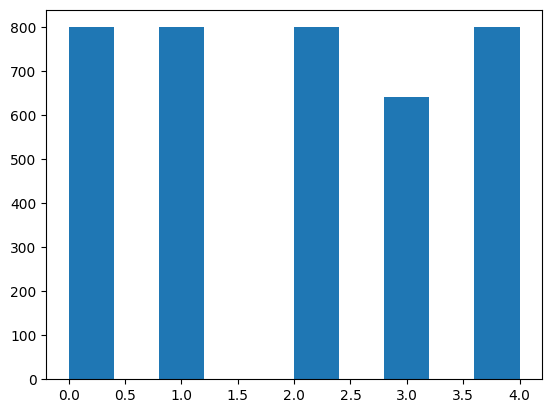

In [ ]:
plt.hist(Y)

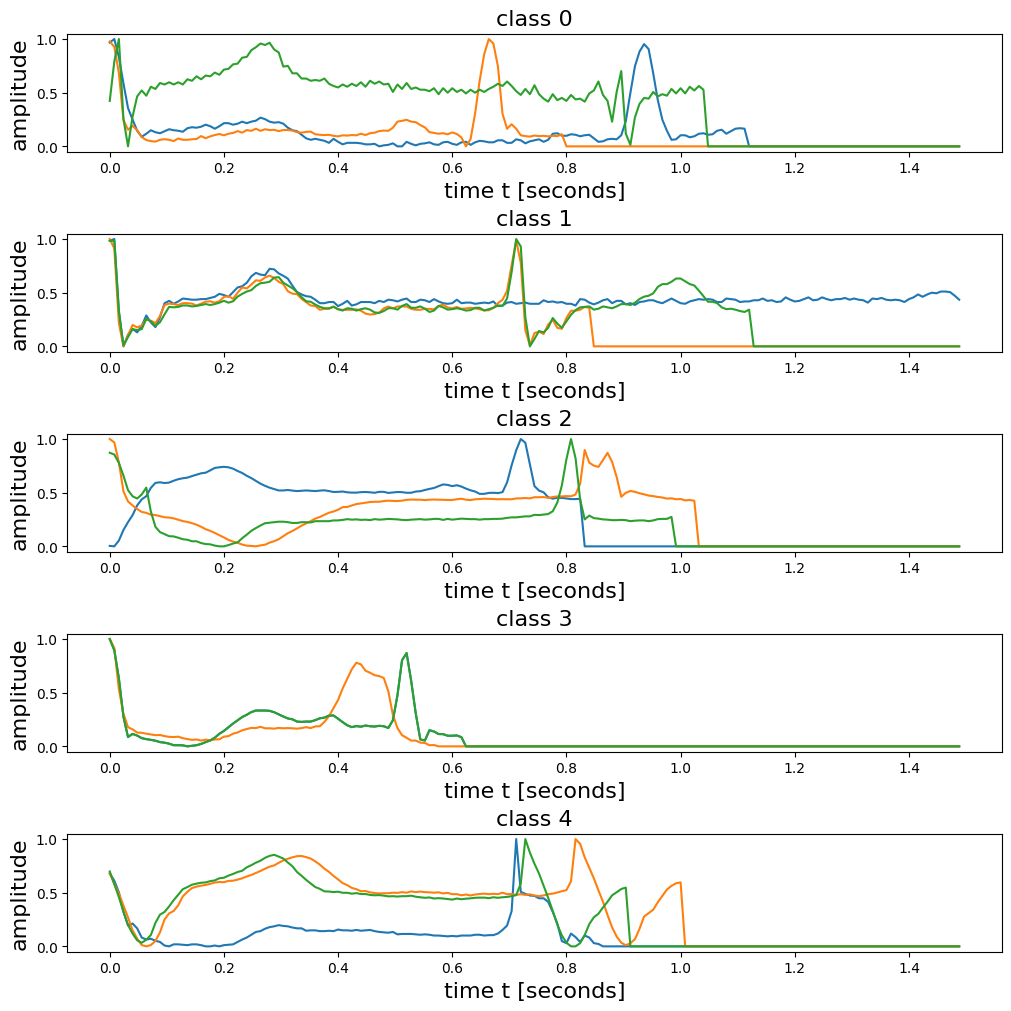

In [ ]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(3072, 187)

In [ ]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [ ]:
Y_train.shape

(3072,)

In [ ]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [ ]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(769, 187)

In [ ]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [ ]:
Y_test.shape

(769,)

In [ ]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

#KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knnTrainAcc = knn.score(X_train, Y_train)
knnTrainAcc

0.8805338541666666

In [ ]:
knnTestAcc = knn.score(X_test, Y_test)
knnTestAcc

0.881664499349805

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg')

In [ ]:
LR.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
LRTrainAcc = LR.score(X_train, Y_train)
LRTrainAcc

0.771484375

In [ ]:
LRTestAcc = LR.score(X_test, Y_test)
LRTestAcc

0.7659297789336801

#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [ ]:
dTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dTreeTrainAcc = dTree.score(X_train, Y_train)
dTreeTrainAcc

1.0

In [ ]:
dTreeTestAcc = dTree.score(X_test, Y_test)
dTreeTestAcc

0.8335500650195059

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rForest = RandomForestClassifier()

In [ ]:
rForest.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
rForestTrainAcc = rForest.score(X_train, Y_train)
rForestTrainAcc

1.0

In [ ]:
rForestTestAcc = rForest.score(X_test, Y_test)
rForestTestAcc

0.9102730819245773

#Compile and show all the results

In [ ]:
training_accuracy = [knnTrainAcc, LRTrainAcc, dTreeTrainAcc, rForestTrainAcc]
test_accuracy = [knnTestAcc, LRTestAcc, dTreeTestAcc, rForestTestAcc]
rows = ["Training Accuracy", "Test Accuracy"]
cols = ["KNeighborsClassifier", "LogisticRegression", "DecisionTreeClassifier","RandomForestClassifier"]

In [ ]:
results = pd.DataFrame((training_accuracy, test_accuracy), index=rows, columns=cols)
results.head()

,KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
Training Accuracy,0.880534,0.771484,1.00000,1.000000
Test Accuracy,0.881664,0.765930,0.83355,0.910273
